# INIT

In [4]:
!python3 -m venv myenvCHAMPI

In [15]:
!python -m ipykernel install --user --name=myenvCHAMPI

Installed kernelspec myenvCHAMPI in /Users/pauldelamarre/Library/Jupyter/kernels/myenvchampi


In [16]:
#Windows
# myenvCHAMPI\Scripts\activate.bat
#Mac
!source myenvCHAMPI/bin/activate

### Relancer la page + selectionner le nouvel env en haut à droite 

In [8]:
!pip install -r requirements.txt

Processing /home/ktietz/src/ci/alabaster_1611921544520/work
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/System/Volumes/Data/home/ktietz/src/ci/alabaster_1611921544520/work'

You should consider upgrading via the '/Users/pauldelamarre/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [49]:
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import os                       # files handling
import re
from random import randint, seed
from IPython.display import display
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Téléchargement des données

In [11]:
import json
def load_json_data():

    # Créer une liste vide pour stocker les données JSON de chaque fichier
    data = []
    
    # Charger chaque fichier JSON et stocker ses données dans la liste de données
    for i in range(1,11):
        with open(f"/Users/pauldelamarre/Desktop/TP_PYTHON/TP_CHAMPI/json_files/observations_{i}.json") as f:
            json_data = json.load(f)
            if i==1:
                df = pd.DataFrame(json_data)
            else:
                df = df.append(json_data, ignore_index=True)
            
            new_cols = {}

    for i, gbif_info in enumerate(df['gbif_info']):
        # Vérification que la valeur est un dictionnaire
        if isinstance(gbif_info, dict):
            # Parcours de toutes les clés du dictionnaire dans la colonne "gbif_info"
            for col in set().union(*(d.keys() for d in [gbif_info])):
                # Création d'une nouvelle colonne avec le nom de la clé et une liste vide pour stocker les valeurs
                if col not in new_cols:
                    new_cols[col] = [None] * len(df.index)
                
                # Stockage de la valeur correspondante dans la liste de la nouvelle colonne
                new_cols[col][i] = gbif_info.get(col)
    
    # Fusion des nouvelles colonnes avec le dataframe principal
    df = df.join(pd.DataFrame(new_cols))
    #for i, image_url in enumerate(df['image_url']):
    #    pass
    return df
df= load_json_data()

In [12]:
pd.set_option('display.max_columns', False)

In [13]:
df.head()

,observation,label,image_id,image_url,user,date,gbif_info,thumbnail,location,genus,kingdomKey,scientificName,canonicalName,species,genusKey,familyKey,orderKey,classKey,phylumKey,phylum,family,rank,confidence,usageKey,synonym,kingdom,speciesKey,status,class,order,matchType,note
0,24671,Boletus nobilissimus,54745,http://mushroomobserver.org/images/320/54745,290,2009-08-24 02:54:15,"{'kingdom': 'Fungi', 'family': 'Boletaceae', '...",1,2259.0,Boletus,5.0,"Boletus nobilissimus Both & R. Riedel, 2000",Boletus nobilissimus,Boletus nobilissimus,7241486.0,8789.0,1063.0,186.0,34.0,Basidiomycota,Boletaceae,SPECIES,98.0,6015253.0,False,Fungi,6015253.0,ACCEPTED,Agaricomycetes,Boletales,EXACT,None
1,24671,Boletus nobilissimus,54746,http://mushroomobserver.org/images/320/54746,290,2009-08-24 02:54:15,"{'kingdom': 'Fungi', 'family': 'Boletaceae', '...",0,2259.0,Boletus,5.0,"Boletus nobilissimus Both & R. Riedel, 2000",Boletus nobilissimus,Boletus nobilissimus,7241486.0,8789.0,1063.0,186.0,34.0,Basidiomycota,Boletaceae,SPECIES,98.0,6015253.0,False,Fungi,6015253.0,ACCEPTED,Agaricomycetes,Boletales,EXACT,None
2,24671,Boletus nobilissimus,54747,http://mushroomobserver.org/images/320/54747,290,2009-08-24 02:54:15,"{'kingdom': 'Fungi', 'family': 'Boletaceae', '...",0,2259.0,Boletus,5.0,"Boletus nobilissimus Both & R. Riedel, 2000",Boletus nobilissimus,Boletus nobilissimus,7241486.0,8789.0,1063.0,186.0,34.0,Basidiomycota,Boletaceae,SPECIES,98.0,6015253.0,False,Fungi,6015253.0,ACCEPTED,Agaricomycetes,Boletales,EXACT,None
3,24672,Russula,54750,http://mushroomobserver.org/images/320/54750,439,2009-08-24 02:55:41,"{'status': 'ACCEPTED', 'kingdom': 'Fungi', 'us...",1,268.0,Russula,5.0,Russula Pers.,Russula,None,2551169.0,7609.0,1144.0,186.0,34.0,Basidiomycota,Russulaceae,GENUS,94.0,2551169.0,False,Fungi,NaN,ACCEPTED,Agaricomycetes,Russulales,EXACT,None
4,24673,Entoloma strictius,54751,http://mushroomobserver.org/images/320/54751,439,2009-08-24 03:04:46,"{'kingdom': 'Fungi', 'family': 'Entolomataceae...",0,268.0,Entoloma,5.0,"Entoloma strictius (Peck) Sacc., 1887",Entoloma strictius,Entoloma strictius,2530002.0,4174.0,1499.0,186.0,34.0,Basidiomycota,Entolomataceae,SPECIES,98.0,6014956.0,False,Fungi,6014956.0,ACCEPTED,Agaricomycetes,Agaricales,EXACT,None


On a un problème avec les urls.

Le Site a changé les chemins des images on passe de 

     http://mushroomobserver.org/images/320/54751   
       
     https://images.mushroomobserver.org/320/54751.jpg

In [45]:
df['image_url'] = df['image_url'].replace('w*$', '.jpg', regex=True) # Ajout du jpg à la fin
df['image_url'] = df['image_url'].replace('mushroomobserver.org/images', 'images.mushroomobserver.org', regex=True) # Changement du chemin

Text(0.5, 1.0, 'Visualisation des valeurs manquantes dans df')

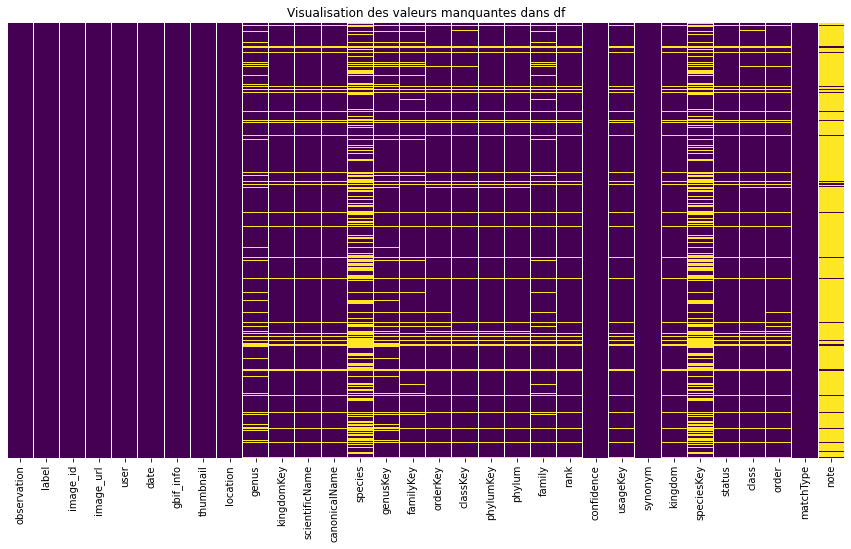

In [52]:
# Instancier une figure de dimension 10,5
plt.figure(figsize=(15, 8))

# Créer une heatmap de seaborn
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Ajouter un titre
plt.title('Visualisation des valeurs manquantes dans df')

In [55]:
dfchampi = df[["label","image_url"]]

Text(0.5, 1.0, 'Visualisation des valeurs manquantes dans dfChampi')

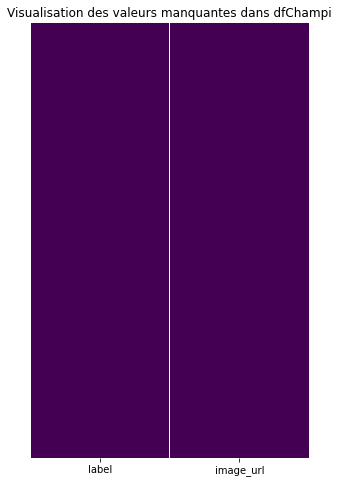

In [57]:
# Instancier une figure de dimension 10,5
plt.figure(figsize=(5, 8))

# Créer une heatmap de seaborn
sns.heatmap(dfchampi.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Ajouter un titre
plt.title('Visualisation des valeurs manquantes dans dfChampi')

In [ ]:
listfrance = ["Agaricus arvensis","Agaricus augustus","Agaricus campestris","Agaricus silvicola","Agaricus xanthoderma","Agrocybe cylindracea","Albatrellus ovinus","Aleuria aurantia","Amanita caesarea","Amanita citrina","Amanita fulva","Amanita junquillea","Amanita gemmata","Amanita muscaria","Amanita ovoidea","Amanita pantherina","Amanita phalloides","Amanita rubescens","Amanita spissa","Amanita vaginata","Amanita verna","Amanita virosa","Ampulloclitocybe clavipes","Anthurus archeri","Armillaria mellea","Auricularia auricula-judae","Boletus aereus","Boletus aestivalis","Boletus appendiculatus","Boletus calopus","Boletus edulis","Boletus erythropus","Boletus luridus","Boletus pinophilus","Boletus queletii","Boletus satanas","Boletus rhodopurpureus","Boletus aereus","Boletus edulis","Boletus pinophilus","Boletus aestivalis","Boletus aereus","Calocera viscosa","Calocybe gambosa","Calvatia excipuliformis","Calvatia gigantea","Cantharellus cibarius","Chalciporus piperatus","Chlorophyllum rhacodes","Chroogomphus rutilus","Clathrus ruber","Clavariadelphus pistillaris","Clavariadelphus truncatus","Clavulina cristata","Clavulina rugosa","Clitocybe amoenolens","Clitocybe connata","Clitocybe nebularis","Clitocybe odora","Clitopilus prunulus","Coprinellus micaceus","Coprinopsis atramentaria","Coprinopsis picacea","Coprinus comatus","Coprinus disseminatus","Cortinarius alboviolaceus","Cortinarius camphoratus","Cortinarius caperatus","Cortinarius cinnamomeus","Cortinarius orellanus","Cortinarius praestans","Cortinarius speciosissimus","Cortinarius splendens","Cortinarius triumphans","Cortinarius varius","Cortinarius violaceus","Craterellus cinereus","Craterellus cornucopioides","Craterellus lutescens","Craterellus tubaeformis","Daedaleopsis tricolor","Dacrymyces stillatus","Disciotis venosa","Dendropolyporus umbellatus","Entoloma clypeatum","Entoloma sinuatum","Entoloma nitidum","Fuligo septica","Flammulina velutipes","Fistulina hepatica","Galerina marginata","Geastrum fimbriatum","Geastrum triplex","Gomphidius glutinosus","Gomphidius roseus","Gomphus clavatus","Grifola frondosa","Gymnopilus penetrans","Gymnopilus spectabilis","Gymnopus dryophilus","Gymnopus peronatus","Gyromitra esculenta","Gyroporus castaneus","Gyroporus cyanescens","Hebeloma crustuliniforme","Hebeloma laterinum","Hebeloma radicosum","Helvella crispa","Helvella lacunosa","Helvella macropus","Hydnum repandum","Hydnum rufescens","Hygrocybe conica","Hygrocybe pratensis","Hygrocybe virginea","Hygrophoropsis aurantiaca","Hygrophorus agathosmus","Hygrophorus eburneus","Hygrophorus latitabundus","Hygrophorus nemoreus","Hygrophorus russula","Hypholoma fasciculare","Hypholoma lateritium","Infundibulicybe geotropa","Infundibulicybe gibba","Inocybe fastigiata","Inocybe rimosa","Inocybe geophylla","Inocybe patouillardii","Inocybe erubescens","Kuehneromyces mutabilis","Laccaria amethystina","Laccaria laccata","Lactarius blennius","Lactarius camphoratus","Lactarius chrysorrheus","Lactarius deliciosus","Lactarius deterrimus","Lactarius lignyotus","Lactarius necator","Lactarius piperatus","Lactarius rufus","Lactarius sanguifluus","Lactarius torminosus","Lactarius vellereus","Lactarius volemus","Laetiporus sulphureus","Leccinum aurantiacum","Leccinum crocipodium","Leccinum lepidum","Leccinum scabrum","Leccinum versipelle","Lepiota brunneoincarnata","Lepiota clypeolaria","Lepiota cristata","Lepista flaccida","Lepista nuda","Lepista saeva","Lepista sordida","Leucoagaricus leucothites","Lycoperdon echinatum","Lycoperdon perlatum","Lyophyllum decastes","Macrolepiota mastoidea","Macrolepiota procera","Marasmius oreades","Megacollybia platyphylla","Morchella elata","Morchella esculenta","Morganella pyriformis","Mutinus caninus","Mycena polygramma","Mycena pura","Mycena rosea","Otidea onotica","Omphalotus olearius","Oudemansiella mucida","Paxillus involutus","Phaeolepiota aurea","Phallus impudicus","Pholiota squarrosa","Pleurotus cornucopiae","Pleurotus eryngii","Pleurotus ostreatus","Pluteus cervinus","Pluteus leoninus","Polyporus squamosus","Psathyrella candolleana","Psathyrella piluliformis","Pseudoclitocybe cyathiformis","Pseudohydnum gelatinosum","Psilocybe semilanceata","Ramaria aurea","Ramaria botrytis","Ramaria formosa","Ramaria stricta","Rhodocollybia butyracea","Russula amara","Russula badia","Russula cutefracta","Russula cyanoxantha","Russula emetica","Russula olivacea","Russula queletii","Russula risigallina","Russula chamaeleontina","Russula sanguinaria","Russula sardonia","Russula drimeia","Russula vesca","Russula virescens","Russula xerampelina","Sarcoscypha coccinea","Schizophyllum commune","Scleroderma citrinum","Scleroderma verrucosum","Sparassis crispa","Strobilomyces strobilaceus","Stropharia aeruginosa","Suillus bovinus","Suillus cavipes","Suillus granulatus","Suillus grevillei","Suillus luteus","Tapinella atrotomentosa","Tremiscus helvelloides","Tricholoma album","Tricholoma equestre","Tricholoma pardinum","Tricholoma portentosum","Tricholoma scalpturatum","Tricholoma sciodes","Tricholoma sulphureum","Tricholoma terreum","Tricholoma virgatum","Tricholomopsis rutilans","Tuber melanosporum","Tylopilus felleus","Volvariella gloiocephala","Xerocomus badius","Xerocomus chrysenteron","Xerula radicata"]

In [75]:
len(dfchampi.loc[dfchampi["label"].isin(listfrance)])

45068

In [77]:
len(listfrance)

242

# Choix de la problématique

In [65]:
len(dfchampi) # Nombre d'observation

595712

In [64]:
len(dfchampi["label"].unique()) # Nombre d'espèces différentes 

11509

In [ ]:
print(list(dfchampi["label"].unique()))

# Téléchargement des images

In [14]:
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request
def download_image(url):
    with urllib.request.urlopen(url) as url_response:
        img_data = url_response.read()
    return img_data

In [15]:
res = download_image("https://images.mushroomobserver.org/320/699256.jpg")

In [ ]:
res

In [16]:
from PIL import Image
import io
img = Image.open(io.BytesIO(res))

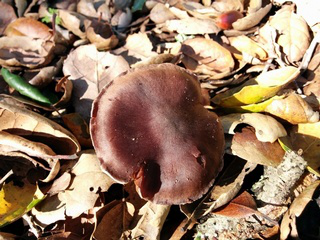

In [17]:
img

In [24]:
pixel_table = np.array(img)

In [25]:
len(pixel_table)

240

In [30]:
pixel_table.shape

(240, 320, 3)

In [32]:
res = download_image("https://images.mushroomobserver.org/320/54751.jpg")

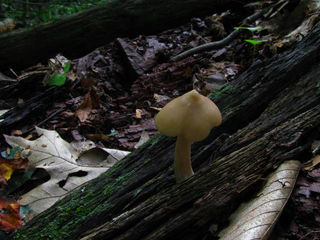

In [34]:
img = Image.open(io.BytesIO(res))
img

# FIN 

In [5]:
!pip freeze > requirements.txt